In [11]:
import torch
from d2l import torch as d2l
from torch import nn
%matplotlib inline

In [12]:
# Â¢ûÂä†L2ÊÉ©ÁΩöÁ≥ªÊï∞Êù•ÂÅöÊùÉÈáçË°∞ÂáèÁöÑ‰∏ªË¶ÅÂ•ΩÂ§ÑÊòØÔºö
#   Èò≤Ê≠¢ËøáÊãüÂêàÔºåÊ®°ÂûãÊõ¥ÁÆÄÊ¥ÅÔºàwÁöÑÊõ¥Â§öÂàÜÈáè‰∏∫0ÔºâÔºåÊèêÈ´òÊ≥õÂåñËÉΩÂäõÔºåËÆ≠ÁªÉÊõ¥Âπ≥Á®≥

# Âíå8‰∏≠‰∏ÄÊ†∑ÔºåÊ†πÊçÆÂ§öÈ°πÂºèÂàõÂª∫Êï∞ÊçÆ
# ËÆæÂÆöÂàùÂßãÂèÇÊï∞
n_train,n_test,num_inputs,batch_size = 20,100,200,5
true_w,true_b = torch.ones((num_inputs,1))*0.01,0.05
train_data = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(train_data,batch_size)
test_data = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(test_data,batch_size,is_train=False)

In [4]:
# Ëé∑ÂèñÊ∑∑Ê∑ÜÁöÑÊùÉÈáçÂèÇÊï∞ÔºåÁî®‰∫éÂàùÂßãÂåñwb
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w,b]

In [5]:
# ÂÆö‰πâl2 Âπ≥ÊñπÂíå*(Œª/2) ËøôÈáåÁöÑŒªËÆæÁΩÆ‰∏∫1
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [8]:
# ÂÆö‰πâËÆ≠ÁªÉ
def train(lambd):  # ÂÖ•ÂèÇÊòØŒªÔºåÂú®l2ËåÉÂºèÂÆö‰πâÈáåÂÜôÁöÑÊòØ1/2ÔºåËøôÈáåÁõ∏ÂΩì‰∫é‰πò‰∏äŒª
    w,b = init_params()
    # lambda Âø´ÈÄüÂÆö‰πâÂåøÂêçÂáΩÊï∞ÔºåÁ≠â‰ª∑‰∫éÔºö
    # def net(X):
    #   return d2l.linreg(X, w, b)
    net,loss = lambda X: d2l.linreg(X,w,b),d2l.squared_loss
    num_epochs,lr = 100,0.003
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],
                                                                             legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            # ÊçüÂ§±ÂáΩÊï∞Ê∑ªÂä†ÊüîÊÄßÈôêÂà∂ l2ËåÉÊï∞ÊÉ©ÁΩöÈ°π
            l = loss(net(X),y)+lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if(epoch+1)%5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('wÁöÑl2ËåÉÊï∞ÊâìÂç∞Ôºö',torch.norm(w).item())


wÁöÑl2ËåÉÊï∞ÊâìÂç∞Ôºö 12.594120979309082


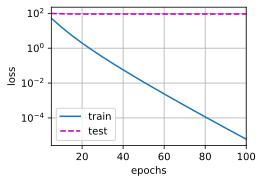

In [9]:
# ‰∏ç‰ΩøÁî®Ê≠£ÂàôÂåñÁöÑÊÉÖÂÜµ
train(lambd=0)
# ÁªìÊûúÊòØÈ™åËØÅÊï∞ÊçÆÈõÜÁöÑËØØÂ∑ÆÊ≤°ÊúâÂáèÂ∞ëÔºåÂè™ÊúâËÆ≠ÁªÉÈõÜËØØÂ∑ÆÂáèÂ∞ëÔºåËØ¥ÊòéËøáÊãüÂêà‰∫ÜÔºåÂè™ËÆ§ËØÜËÆ≠ÁªÉÊï∞ÊçÆ

wÁöÑl2ËåÉÊï∞ÊâìÂç∞Ôºö 0.35382282733917236


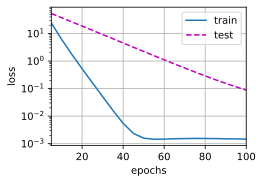

In [10]:
# ‰ΩøÁî®ÊùÉÈáçË°∞ÂáèÔºåÂ∞±ÊòØÂ∞ÜwÂêëÈáèÂæÄ0ÊãâÔºåÂ∞ΩÈáèÂèòÂ∞èÊï¥‰Ωì
train(lambd=3)

In [13]:
def train_concise(wd):  # wdÂ∞±ÊòØÊÉ©ÁΩöÁ≥ªÊï∞
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_() # ÂØπÊ®°ÂûãÁöÑÊâÄÊúâÂèÇÊï∞ÁîüÊàêÊ≠£ÊÄÅÂàÜÂ∏ÉÈöèÊú∫Êï∞
    loss = nn.MSELoss(reduction='none')
    num_epochs ,lr = 100,0.003
    # ÊùÉÈáçË°∞ÂáèÔºàweight_decayÔºâÂÖ∂ÂÆûÂ∞±ÊòØ L2 Ê≠£ÂàôÂåñÁöÑ‰∏ÄÁßçÂΩ¢ÂºèÔºåÈÄöÂ∏∏Âú®ÊçüÂ§±ÂáΩÊï∞‰∏≠Âä†‰∏ä ùúÜ‚à•ùúÉ‚à•^2 Œª‚à•Œ∏‚à•^2 È°πÔºàÂÖ∂‰∏≠ 
    # Œ∏ ÊòØÊ®°ÂûãÂèÇÊï∞ÔºåùúÜ ÊòØÊÉ©ÁΩöÁ≥ªÊï∞Ôºâ„ÄÇËøôÂèØ‰ª•Â∏ÆÂä©Èò≤Ê≠¢ËøáÊãüÂêà„ÄÇ
    # ‰∏çËøáÔºåÂú® torch.optim.SGD ÊàñÂÖ∂‰ªñ‰ºòÂåñÂô®‰∏≠ÊåáÂÆö weight_decay ÂÖ∂ÂÆûÊòØ‰∏Ä‰∏™Á≠âÊïàÁöÑÂÆûÁé∞ÊñπÂºè
    # Âú® PyTorch ‰∏≠ÔºåÂΩì‰Ω†ËÆæÁΩÆ weight_decayÔºå‰ºòÂåñÂô®‰ºöÂú®ÊØèÊ¨°Êõ¥Êñ∞ÊùÉÈáçÊó∂ÔºåÂØπÊùÉÈáçÂÜçÂ§ö -Â≠¶‰π†Áéá*ŒªùúÉ
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay':wd},  # wd‰∏ÄËà¨Áªô0.001ÊàñËÄÖÊõ¥Â∞èÔºå‰∏ÄËà¨‰∏ç‰ºöÂèñÂà∞1
        {"params":net[0].bias}]
        ,lr
        )
    # ‰ª•‰∏äÁöÑ‰ª£Á†ÅÊòØÂè™ÂØπweghtÂÅöË°∞ÂáèÔºåÂ¶ÇÊûúbÂèÇÊï∞‰πüË¶ÅÔºåÂèØ‰ª•Ëøô‰πàÂÜô
    # torch.optim.SGD(params=net.parameters(),lr=lr,weight_decay=wd)
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',
                            xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.mean().backward()
            trainer.step()
        if(epoch+1)%5 ==0:
            animator.add(epoch+1,
                         (d2l.evaluate_loss(net,train_iter,loss),
                          d2l.evaluate_loss(net,test_iter,loss)))
        print('wÁöÑl2ËåÉÊï∞',net[0].weight.norm().item())



wÁöÑl2ËåÉÊï∞ 12.665392875671387


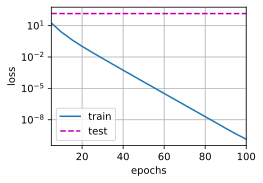

In [14]:
train_concise(0)

wÁöÑl2ËåÉÊï∞ 0.01798509620130062


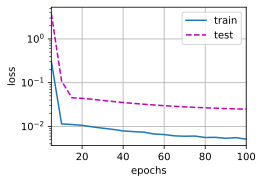

In [16]:
train_concise(30)